###  print out structures

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

layernumber == L1
nonlin == True
weightsinit == 2
debug_bw == True
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == True
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
inputs
[   Value(name=v008,layernumber=,neuronnumber=,weightnumber=,type=i,data=7, grad=0),
    Value(name=v009,layernumber=,neuronnumber=,weightnumber=,type=i,data=8, grad=0)]
backward mul

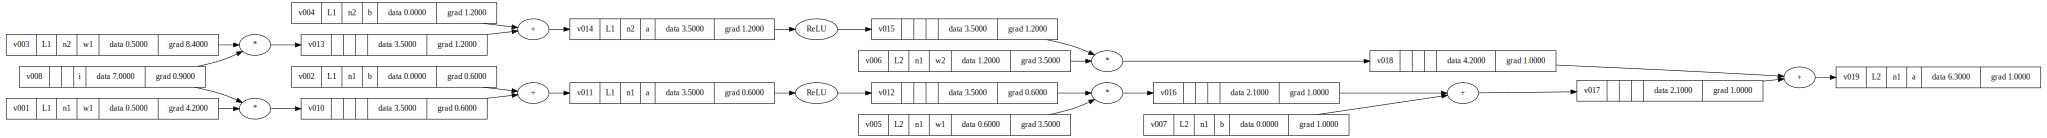

In [2]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], lastReLU=True, weightsinit=2, debug_bw=True
)  # 1-layer neural network
print("parameters")
pp.pprint(model.parameters())

xinumbers = list(range(7, 7 + nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
activation.backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(activation, debug_print_01=False)

#### Multi Layer Perceptron 1-2-2

layernumber == L1
nonlin == False
weightsinit == 2
debug_bw == True
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == True
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.30000000000000004, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=n1,weightnumber=,type=w2,data=1.0, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v008,layernumber=L2,neuronnumber=n2,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v009,layernumber=L2,neuronnumber=n2,weightnumber=,type=w2,data=1.200000000000000

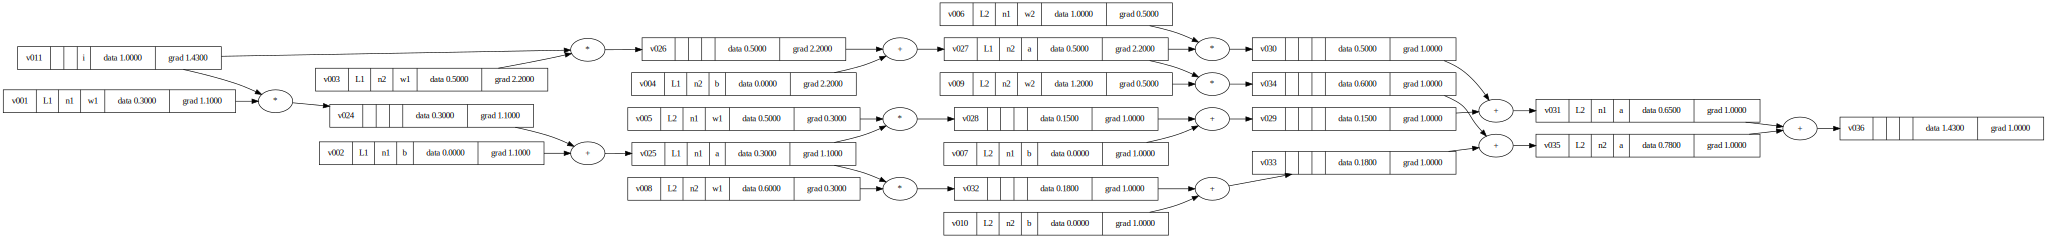

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 2  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 1-layer neural network
print("parameters")
pp.pprint(model.parameters())

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

print("model(xinput)")
pp.pprint(model(xinput))

activation = []
activation = model(xinput)

loss = activation[1] + activation[0]
loss.backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### Multi Layer Perceptron 3-4-4-1

In [4]:
# loss function single MLP
def loss_single(target, output):
    # total_loss = (output - target)*(output - target)
    total_loss = output + target
    total_loss.type = "l"
    return total_loss

layernumber == L1
nonlin == False
weightsinit == 2
debug_bw == True
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == True
layernumber == L3
nonlin == False
weightsinit == 2
debug_bw == True
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.2, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=w2,data=0.4, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=n1,weightnumber=,type=w3,data=0.6000000000000001, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.30000000000000004, grad=0),
    Value(name=v006,layernumber=L1,neuronnumber=n2,weightnumber=,type=w2,data=0.6000000000000001, grad=0),
    Value(name=v007,layernumber=L1,neuronnumber=n2,weightnumber=,type=w3,data=0.9000000000000001, grad=0),
    Value(name=v008,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0, gra

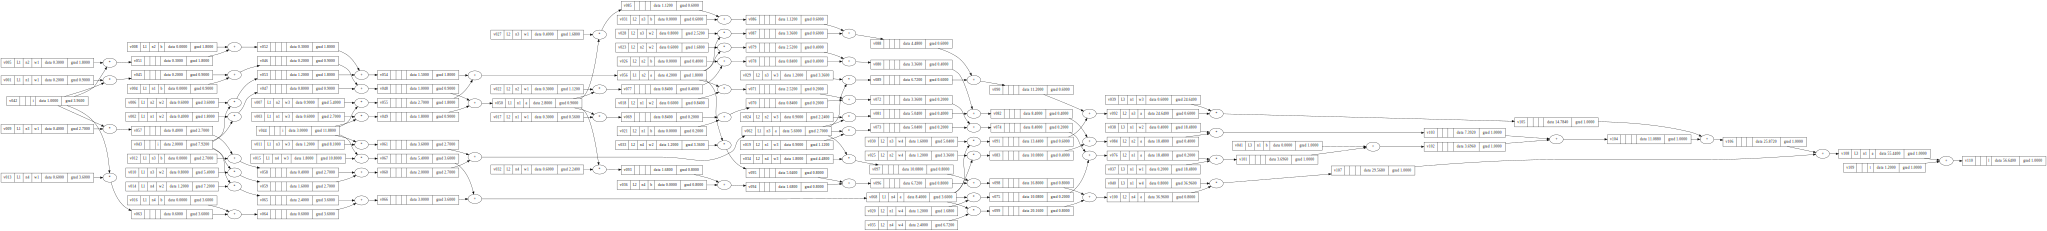

In [5]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 2-layer neural network
print("parameters")
pp.pprint(model.parameters())

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)

# ys = [[1.0]]
xtarget = Value(1.2, type="t")  # desired targets

loss = loss_single(activation, xtarget)
loss.backward()
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### 4 times Multi Layer Perceptron 3-4-4-1

In [6]:
# loss function multiple MLP's
def loss_mult(targets, outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss

layernumber == L1
nonlin == False
weightsinit == 2
debug_bw == True
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == True
layernumber == L3
nonlin == False
weightsinit == 2
debug_bw == True
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=n1,weightnumber=,type=w3,data=1.8000000000000003, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.30000000000000004, grad=0),
    Value(name=v006,layernumber=L1,neuronnumber=n2,weightnumber=,type=w2,data=0.6000000000000001, grad=0),
    Value(name=v007,layernumber=L1,neuronnumber=n2,weightnumber=,type=w3,data=0.9000000000000001, grad=0),
    Value(name=v008,layernumber=L1,neuronnumber=n2,we

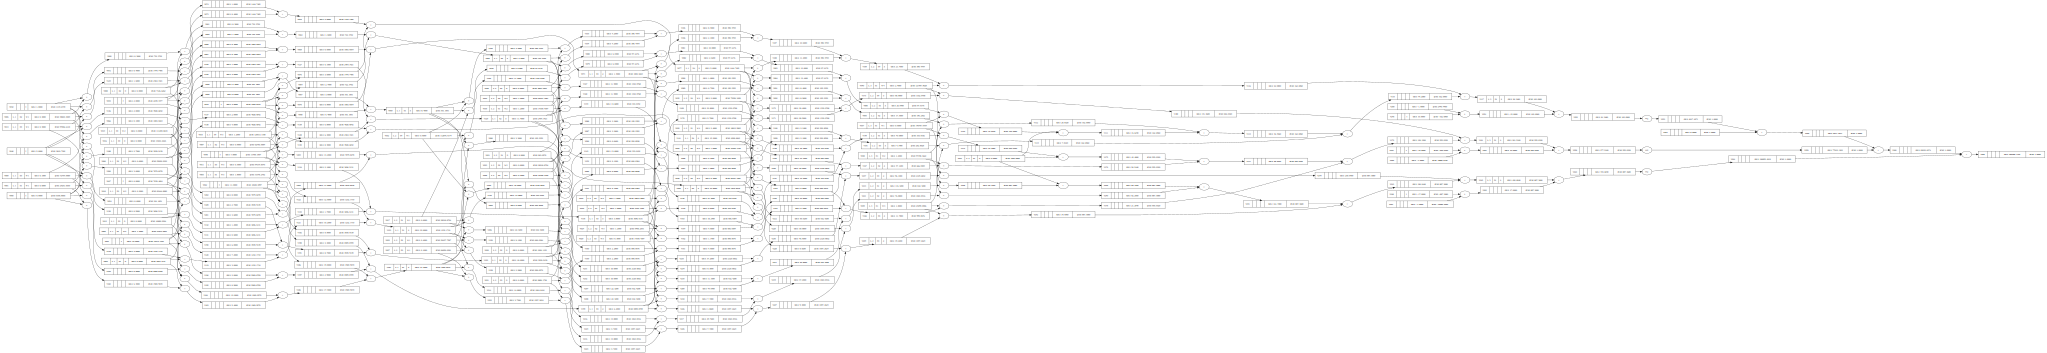

In [7]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs

Value.value_counter = 0

model = MLP(nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=True)  # 2-layer neural network
print("parameters")
pp.pprint(model.parameters())

xinumbers1 = np.array(list(range(1, nin * 4 + 1)))
xinumbers = xinumbers1.reshape(nin, 4)
print(xinumbers)

xinput = [[Value(3) for x in range(4)] for y in range(3)]

for i in range(len(xinumbers)):
    for j in range(len(xinumbers[i])):
        xinput[i][j].type = "i"
        xinput[i][j].data = xinumbers[i][j]

# print("input 0 ", xinput[0])
print("inputs")
pp.pprint(xinput)

activation = [model(x) for x in xinput]

ys = [15.0, -16.0, -17.0, 18.0]  # desired targets
xtarget = [Value(x, type="t") for x in ys]
print("xtarget")
pp.pprint(xtarget)

loss = loss_mult(activation, xtarget)
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)
loss.backward()

draw_dot(loss)